In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten ,Dense

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   fill_mode='nearest',
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('Dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 358 images belonging to 2 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [4]:
test_set = test_datagen.flow_from_directory('Dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 358 images belonging to 2 classes.


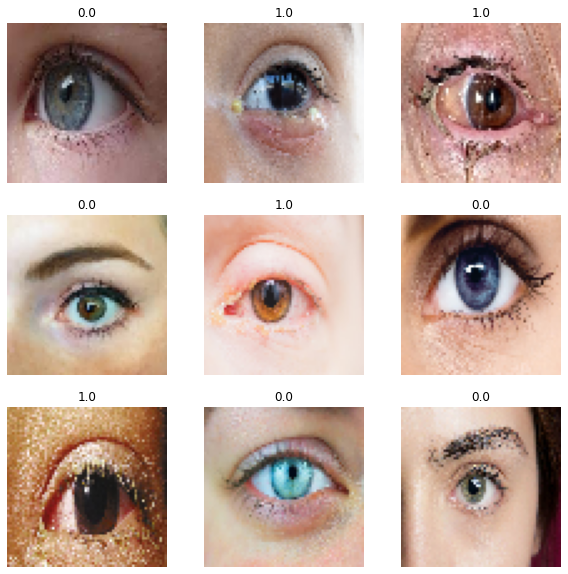

In [5]:
import matplotlib.pyplot as plt

images, labels = next(test_set)

plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(str(labels[i]) if labels[i] == 0 else str(labels[i]))
    plt.axis('off')

plt.show()

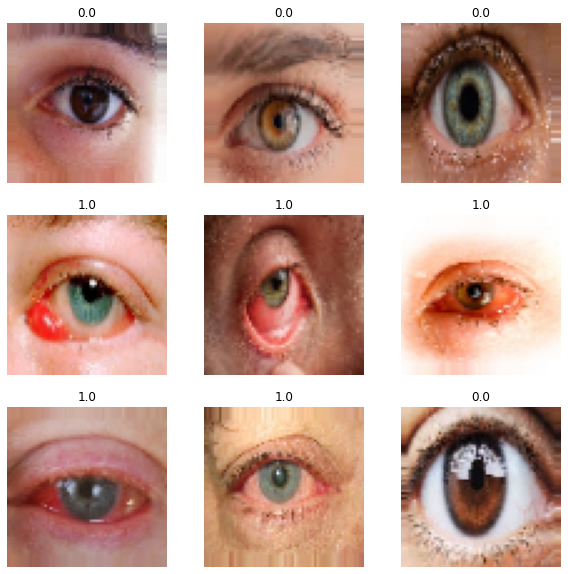

In [6]:
import matplotlib.pyplot as plt

images, labels = next(training_set )

plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(str(labels[i]) if labels[i] == 0 else str(labels[i]))
    plt.axis('off')

plt.show()

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [9]:
model.add(MaxPool2D(pool_size=2, strides=2))

In [10]:
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))


In [11]:
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [12]:
model.add(Flatten())

In [13]:
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [14]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [15]:
history=model.fit(x = training_set, validation_data = test_set, epochs = 100)

Epoch 1/100
12/12 [==============================] - 11s 858ms/step - loss: 0.6989 - accuracy: 0.5251 - val_loss: 0.6737 - val_accuracy: 0.5950
Epoch 2/100
12/12 [==============================] - 5s 402ms/step - loss: 0.6432 - accuracy: 0.6453 - val_loss: 0.6258 - val_accuracy: 0.6313
Epoch 3/100
12/12 [==============================] - 4s 339ms/step - loss: 0.6501 - accuracy: 0.6173 - val_loss: 0.6130 - val_accuracy: 0.5615
Epoch 4/100
12/12 [==============================] - 5s 390ms/step - loss: 0.5538 - accuracy: 0.7291 - val_loss: 0.4678 - val_accuracy: 0.8017
Epoch 5/100
12/12 [==============================] - 5s 384ms/step - loss: 0.4419 - accuracy: 0.8101 - val_loss: 0.3826 - val_accuracy: 0.8156
Epoch 6/100
12/12 [==============================] - 4s 341ms/step - loss: 0.4134 - accuracy: 0.8101 - val_loss: 0.3590 - val_accuracy: 0.8380
Epoch 7/100
12/12 [==============================] - 4s 337ms/step - loss: 0.3768 - accuracy: 0.8296 - val_loss: 0.3028 - val_accuracy: 0.882

Epoch 58/100
12/12 [==============================] - 4s 350ms/step - loss: 0.0267 - accuracy: 0.9888 - val_loss: 0.0229 - val_accuracy: 0.9944
Epoch 59/100
12/12 [==============================] - 4s 342ms/step - loss: 0.0173 - accuracy: 1.0000 - val_loss: 0.0119 - val_accuracy: 0.9972
Epoch 60/100
12/12 [==============================] - 4s 348ms/step - loss: 0.0177 - accuracy: 0.9944 - val_loss: 0.0182 - val_accuracy: 0.9944
Epoch 61/100
12/12 [==============================] - 4s 350ms/step - loss: 0.0259 - accuracy: 0.9888 - val_loss: 0.0179 - val_accuracy: 0.9944
Epoch 62/100
12/12 [==============================] - 5s 391ms/step - loss: 0.0288 - accuracy: 0.9944 - val_loss: 0.0078 - val_accuracy: 0.9972
Epoch 63/100
12/12 [==============================] - 4s 365ms/step - loss: 0.0161 - accuracy: 0.9916 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 64/100
12/12 [==============================] - 5s 410ms/step - loss: 0.0759 - accuracy: 0.9804 - val_loss: 0.0450 - val_accuracy:

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

In [59]:
test_loss, test_acc = model.evaluate(test_set)
print(f"Test accuracy: {test_acc * 100:.2f} %")

12/12 [==============================] - 2s 122ms/step - loss: 0.0129 - accuracy: 0.9972
Test accuracy: 99.72 %


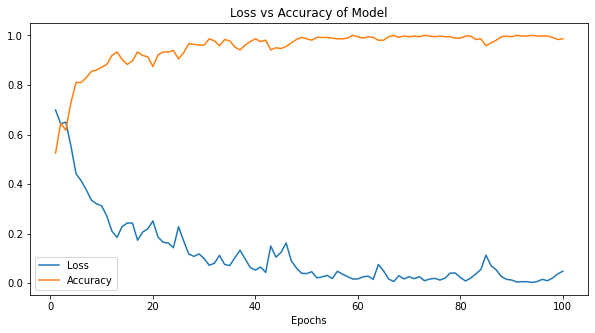

In [18]:
import matplotlib.pyplot as plt

epochs = range(1, 101) 
plt.figure(figsize=(10, 5))
plt.title("Loss vs Accuracy of Model")
plt.plot(epochs, history.history['loss'][:200], label='Loss')
plt.plot(epochs, history.history['accuracy'][:200], label='Accuracy')
plt.grid()
plt.xlabel("Epochs")
plt.grid()
plt.legend()
plt.show()

In [19]:
import numpy as np
actual = np.empty(0)
pred = np.empty(0)
for i, (test_images, true_labels) in enumerate(test_set):
    predictions = model.predict(test_images)
    binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]
    true_labels = [int(label) for label in true_labels]
    
    for true_label, binary_prediction in zip(true_labels, binary_predictions):
        label_string = 'Normal Eye' if true_label == 1 else 'Infected Eye'
        prediction_string = 'Normal Eye' if binary_prediction == 1 else 'Infected Eye'
        actual = np.append(actual,[label_string])
        pred = np.append(pred,[prediction_string])
        print(f"True Label: {label_string}, Predicted Label: {prediction_string}")

    if i == len(test_set) - 1:
        break  
print(actual)
print("\n\n\n\n")
print(pred)

1/1 [==============================] - 0s 163ms/step
True Label: Normal Eye, Predicted Label: Normal Eye
True Label: Normal Eye, Predicted Label: Normal Eye
True Label: Infected Eye, Predicted Label: Infected Eye
True Label: Infected Eye, Predicted Label: Infected Eye
True Label: Infected Eye, Predicted Label: Infected Eye
True Label: Normal Eye, Predicted Label: Normal Eye
True Label: Normal Eye, Predicted Label: Normal Eye
True Label: Infected Eye, Predicted Label: Infected Eye
True Label: Normal Eye, Predicted Label: Normal Eye
True Label: Infected Eye, Predicted Label: Infected Eye
True Label: Normal Eye, Predicted Label: Normal Eye
True Label: Normal Eye, Predicted Label: Normal Eye
True Label: Normal Eye, Predicted Label: Normal Eye
True Label: Infected Eye, Predicted Label: Infected Eye
True Label: Normal Eye, Predicted Label: Normal Eye
True Label: Normal Eye, Predicted Label: Normal Eye
True Label: Normal Eye, Predicted Label: Normal Eye
True Label: Normal Eye, Predicted Label

1/1 [==============================] - 0s 45ms/step
True Label: Infected Eye, Predicted Label: Infected Eye
True Label: Infected Eye, Predicted Label: Infected Eye
True Label: Normal Eye, Predicted Label: Normal Eye
True Label: Infected Eye, Predicted Label: Infected Eye
True Label: Normal Eye, Predicted Label: Normal Eye
True Label: Infected Eye, Predicted Label: Infected Eye
True Label: Infected Eye, Predicted Label: Infected Eye
True Label: Normal Eye, Predicted Label: Normal Eye
True Label: Infected Eye, Predicted Label: Infected Eye
True Label: Normal Eye, Predicted Label: Normal Eye
True Label: Infected Eye, Predicted Label: Infected Eye
True Label: Normal Eye, Predicted Label: Normal Eye
True Label: Normal Eye, Predicted Label: Normal Eye
True Label: Infected Eye, Predicted Label: Infected Eye
True Label: Normal Eye, Predicted Label: Normal Eye
True Label: Infected Eye, Predicted Label: Infected Eye
True Label: Infected Eye, Predicted Label: Infected Eye
True Label: Normal Eye, 

1/1 [==============================] - 0s 95ms/step
True Label: Normal Eye, Predicted Label: Normal Eye
True Label: Normal Eye, Predicted Label: Normal Eye
True Label: Normal Eye, Predicted Label: Normal Eye
True Label: Normal Eye, Predicted Label: Normal Eye
True Label: Infected Eye, Predicted Label: Infected Eye
True Label: Normal Eye, Predicted Label: Normal Eye
1/1 [==============================] - 0s 43ms/step
True Label: Normal Eye, Predicted Label: Normal Eye
True Label: Infected Eye, Predicted Label: Infected Eye
True Label: Normal Eye, Predicted Label: Normal Eye
True Label: Infected Eye, Predicted Label: Infected Eye
True Label: Normal Eye, Predicted Label: Normal Eye
True Label: Normal Eye, Predicted Label: Normal Eye
True Label: Infected Eye, Predicted Label: Infected Eye
True Label: Infected Eye, Predicted Label: Infected Eye
True Label: Infected Eye, Predicted Label: Infected Eye
True Label: Normal Eye, Predicted Label: Normal Eye
True Label: Normal Eye, Predicted Label:

In [20]:
import numpy as np
import keras
from keras.preprocessing import image
import matplotlib.pyplot as plt
def predict_image(image_path):
    test_image = keras.utils.load_img(image_path, target_size = (64, 64))
    plt.imshow(test_image)
    test_image = keras.utils.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    training_set.class_indices
    if result[0][0] == 1:
        return 'Infected Eye'
    else:
        return 'Normal Eye'


1/1 [==============================] - 0s 26ms/step


'Normal Eye'

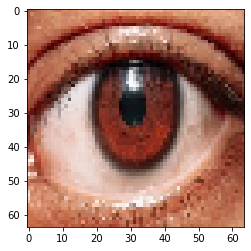

In [21]:
predict_image('Dataset/test/healthy_eye/1.jpg')

1/1 [==============================] - 0s 27ms/step


'Normal Eye'

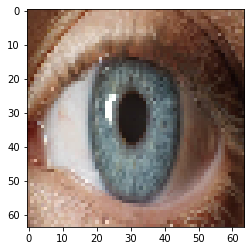

In [22]:
predict_image('Dataset/test/healthy_eye/10.jpg')

1/1 [==============================] - 0s 21ms/step


'Infected Eye'

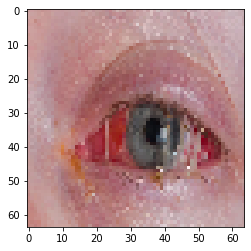

In [23]:
predict_image('Dataset/test/infected_eye/1.jpg')

1/1 [==============================] - 0s 21ms/step


'Infected Eye'

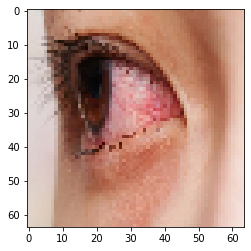

In [25]:
predict_image('Dataset/test/infected_eye/10.jpg')

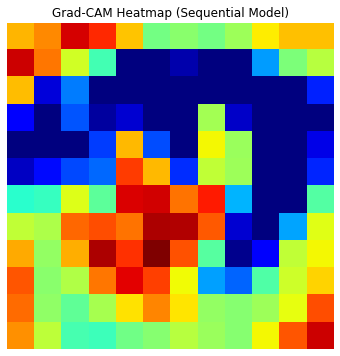

In [40]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def grad_cam_sequential(model, img_array, layer_name):
    # Create a sub-model that outputs the target layer and final predictions
    grad_model = tf.keras.models.Model(
        inputs=model.inputs,
        outputs=[model.get_layer(layer_name).output, model.output]
    )
    
    # Compute gradients
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, np.argmax(predictions[0])]  # For the top predicted class
    
    # Calculate gradients and pooled gradients
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))  # Global average pooling
    
    # Generate heatmap
    conv_outputs = conv_outputs[0]  # Remove batch dimension
    heatmap = tf.reduce_sum(tf.multiply(conv_outputs, pooled_grads), axis=-1)
    heatmap = tf.maximum(heatmap, 0)  # ReLU
    heatmap /= tf.reduce_max(heatmap)  # Normalize
    
    return heatmap.numpy()


img_path = "Dataset/test/healthy_eye/1.jpg"
img = tf.keras.utils.load_img(img_path, target_size=(64, 64)) 
img_array = tf.keras.utils.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  

# Generate heatmap
last_conv_layer_name = "conv2d_2"  
heatmap = grad_cam_sequential(model, img_array, last_conv_layer_name)

# Overlay heatmap on the image
plt.figure(figsize=(10, 6))
plt.imshow(img_array[0])
plt.imshow(heatmap, cmap='jet', alpha=1) 
plt.axis('off')
plt.title("Grad-CAM Heatmap (Sequential Model)")
plt.show()

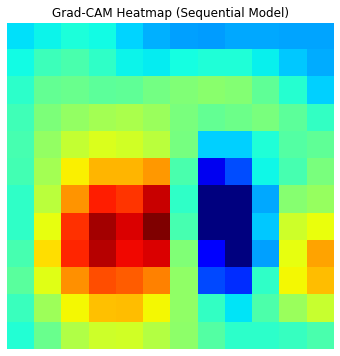

In [45]:
img_path = "Dataset/test/infected_eye/1.jpg"
img = tf.keras.utils.load_img(img_path, target_size=(64, 64))
img_array = tf.keras.utils.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Generate heatmap
last_conv_layer_name = "conv2d_2"
heatmap = grad_cam_sequential(model, img_array, last_conv_layer_name)

# Overlay heatmap on the image
plt.figure(figsize=(10, 6))
plt.imshow(img_array[0])
plt.imshow(heatmap, cmap='jet', alpha=1)
plt.axis('off')
plt.title("Grad-CAM Heatmap (Sequential Model)")
plt.show()

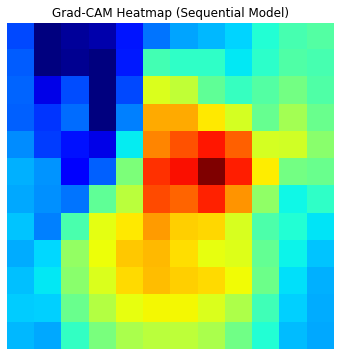

In [47]:
img_path = "Dataset/test/infected_eye/10.jpg"
img = tf.keras.utils.load_img(img_path, target_size=(64, 64))
img_array = tf.keras.utils.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Generate heatmap
last_conv_layer_name = "conv2d_2"
heatmap = grad_cam_sequential(model, img_array, last_conv_layer_name)

# Overlay heatmap on the image
plt.figure(figsize=(10, 6))
plt.imshow(img_array[0])
plt.imshow(heatmap, cmap='jet', alpha=1)
plt.axis('off')
plt.title("Grad-CAM Heatmap (Sequential Model)")
plt.show()

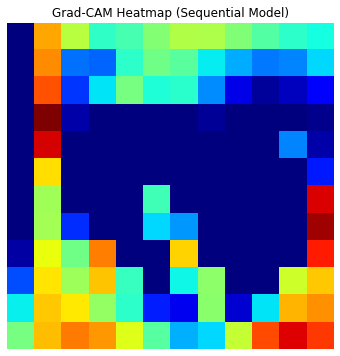

In [52]:
img_path = "Dataset/test/healthy_eye/103.jpg"
img = tf.keras.utils.load_img(img_path, target_size=(64, 64))
img_array = tf.keras.utils.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Generate heatmap
last_conv_layer_name = "conv2d_2"
heatmap = grad_cam_sequential(model, img_array, last_conv_layer_name)

# Overlay heatmap on the image
plt.figure(figsize=(10, 6))
plt.imshow(img_array[0])
plt.imshow(heatmap, cmap='jet', alpha=1)
plt.axis('off')
plt.title("Grad-CAM Heatmap (Sequential Model)")
plt.show()

Found 358 images belonging to 2 classes.
12/12 [==============================] - 2s 138ms/step


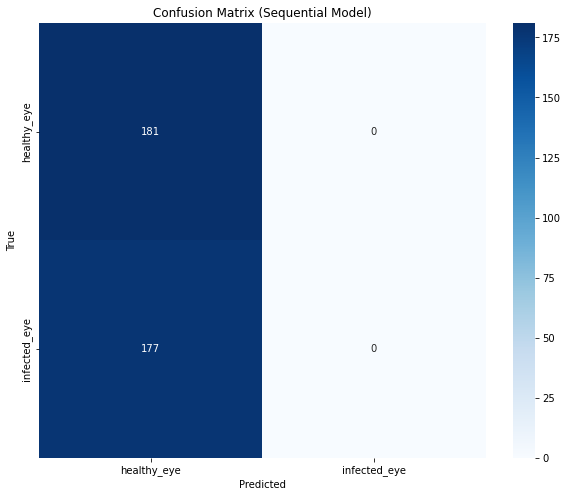

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Load test data (replace with your test directory)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'Dataset/test',
    target_size=(64, 64),  # Match your model's input size
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Critical for correct label order
)

# Get true labels and model predictions
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
class_names = list(test_generator.class_indices.keys())

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Sequential Model)')
plt.show()

In [54]:
model.save('Eyedisease.h5')
